In [1]:
#import data
#fname="temp.txt"
fname='2015-09-09_flipflop.txt'
f1=file(fname)

filetext=f1.readlines()

data=[]
for i in range(12,len(filetext)):
    data.append(map(float, filetext[i].split()))
import pylab as py

## vectors t, x1, x2, x3, ...
d1=py.transpose(data)        

In [9]:
ts=5000.0 #points/second
#stt=1.6
#end=2.0
stt=800.0 #start time
end=920.0 #end time

#fig1=py.figure(figsize=(18,6))
#ax1=fig1.add_subplot(111)

t0=d1[0,stt*ts:end*ts]

s=1 #delay

# define data vectors/arrays
x1 = d1[1, stt*ts : end*ts] #time series data from osc_1
y1 = d1[2, stt*ts : end*ts]
x2 = d1[3, stt*ts : end*ts] #time series data from osc_2
y2 = d1[4, stt*ts : end*ts]
x3 = d1[5, stt*ts : end*ts] #time series data from osc_3
y3 = d1[6, stt*ts : end*ts]

import numpy as np
np.savetxt('2015-09-09_flipflop.txt', transpose([t0,x1,y1,x2,y2,x3,y3]))

Populating the interactive namespace from numpy and matplotlib


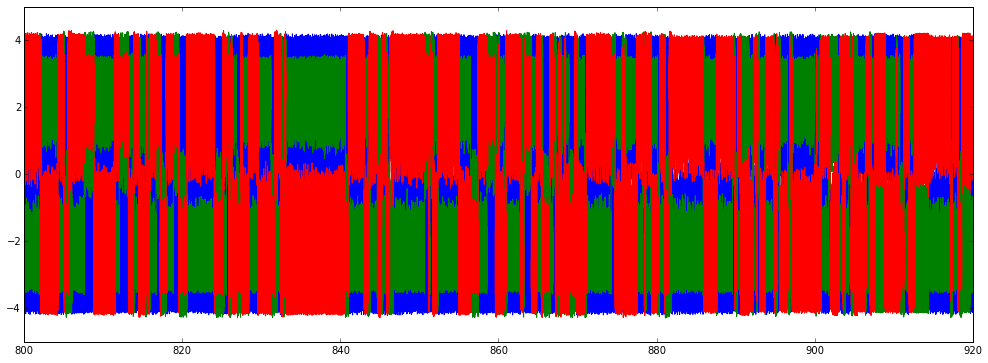

In [6]:
#y0 = d1[1, stt*ts + s : end*ts + s] #time series data from osc_1 delayed by s
#z0 = d1[3, stt*ts + s : end*ts + s] #time series data from osc_2 delayed by s

%pylab inline
figure(figsize=(17,6))
plot(t0, y1)
plot(t0, y2)
plot(t0, y3)
show()

In [23]:
#sparsify
step=100
t=[]
x=[]
y=[]
z=[]
for i in range(len(t0)/step):
    t.append(t0[i*step])
    x.append(x0[i*step])
    y.append(y0[i*step])
    z.append(z0[i*step])

# calculate 3D histogram of size (nx,ny,nz) where nx is the number
# of bins for x, ny for y, nz for z. This is the tricky part since
# the size of bins is quite critical. However you could start with
# say nx=20, i.e. 20 bins evenly spaced between the min and max values
# of x
import numpy as np # histogramdd, array, transpose
nx=ny=nz=2


H, edges = np.histogramdd([x,y,z], bins=(nx,ny,nz))

# add small probability mass everywhere to avoid divide by zeros,
# e.g. 1e-9 (you can experiment with different values). This part
# was a bit of a fudge and should be replaced with something more
# sensible - but I never got round to it
#H = H + 1e-12

# renormalise so sums to unity
P = H  / np.sum(H)

# now sum along the first dimension to create a 2D array of p(y,z)
P_yz = np.sum(P, axis=0)
P_xy = np.sum(P, axis=2)
    
#py.matshow(P_yz)
#py.show()

# replicate the 2D array at each element in the first dimension
# so as to regain a (nx,ny,nz) array (this is purely for computational
# ease)
from numpy.matlib import repmat

P_yz = repmat(P_yz,nx,1).reshape(nx,ny,nz)
P_xy = repmat(P_xy,nx,1).reshape(nx,ny,nz)

# now sum along the first and third dimension to give 1D array of p(y)
P_y = np.sum(P,axis=(0,2))

# replicate in both the x and z directions
P_y = repmat(P_y,nx,nz).reshape(nx,ny,nz)

# create conditional probability mass functions
P_x_given_yz = P / P_yz
P_x_given_y  = P_xy / P_y

# calculate transfer entropy
logP = np.log(P_x_given_yz / P_x_given_y)
logP = np.nan_to_num(logP)

T = np.sum(P * logP)

print T
# Once you calculate T, you can then repeat the procedure by
# switching x to be the time series data for osc_2 and then
# compare the new value of T with the old one.

# Open issues:
# what is the best value of delay s? This is a big question and
# could probably only be answered by trial and error, or a bit
# of common sense from the physics.

import pylab as py
py.clf()
py.plot(t0, x0, 'r-')
#py.plot(t0, y0, 'g-')
py.plot(t0, z0, 'b-')
py.plot(t, x, 'r.')
#py.plot(t, y, 'g.')
py.plot(t, z, 'b.')
#py.plot(x,z)
py.savefig("test.png")

NameError: name 'z0' is not defined

In [24]:
def MutInf(x1, x2, Nbins=(20,20,20), s=1):
    import numpy as np # histogramdd, array, transpose
   
    # define data vectors/arrays
    x = x1[:-s] #time series data from osc_1
    y = x1[s:] #time series data from osc_1 delayed by s
    z = x2[s:] #time series data from osc_2 delayed by s

    # calculate 3D histogram of size (nx,ny,nz) where nx is the number
    # of bins for x, ny for y, nz for z. This is the tricky part since
    # the size of bins is quite critical. However you could start with
    # say nx=20, i.e. 20 bins evenly spaced between the min and max values
    # of x
    nx,ny,nz = Nbins
    H, edges = np.histogramdd([x,y,z], bins=(nx,ny,nz))

    # add small probability mass everywhere to avoid divide by zeros,
    # e.g. 1e-9 (you can experiment with different values). This part
    # was a bit of a fudge and should be replaced with something more
    # sensible - but I never got round to it
    #H = H + 1e-12

    # renormalise so sums to unity
    P = H  / np.sum(H)

    # now sum along the first dimension to create a 2D array of p(y,z)
    P_yz = np.sum(P, axis=0)

    # replicate the 2D array at each element in the first dimension
    # so as to regain a (nx,ny,nz) array (this is purely for computational
    # ease)
    from numpy.matlib import repmat

    P_yz = repmat(P_yz,nx,1).reshape(nx,ny,nz)

    # now sum along the first and third dimension to give 1D array of p(y)
    P_y = np.sum(P,axis=(0,2))

    # replicate in both the x and z directions
    P_y = repmat(P_y,nx,nz).reshape(nx,ny,nz)

    P_xy = np.sum(P,axis=2)
    P_xy = repmat(P_xy,nz,1).reshape(nx,ny,nz)
    
    # create conditional probability mass functions
    P_x_given_yz = P / P_yz
    P_x_given_y  = P_xy / P_y

    # calculate transfer entropy
    logP = np.log(P_x_given_yz / P_x_given_y)
    logP = np.nan_to_num(logP)

    T = np.sum(P * logP)

    return T

In [11]:
fname='2015-09-09_flipflop.txt'
f1=file(fname)

filetext=f1.readlines()

data=[]
for i in range(len(filetext)):
    data.append(map(float, filetext[i].split()))
import pylab as py

## vectors t, x1, x2, x3, ...
d1=py.transpose(data)        

1.5370843357 1.52428317039
1.30757029348 1.29281466747
1.01884072087 1.03712860071


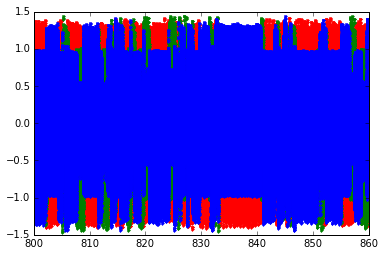

In [29]:
ts=5000.0 #points/second
#stt=1.6
#end=2.0
stt=0.0 #start time
end=60.0 #end time

#fig1=py.figure(figsize=(18,6))
#ax1=fig1.add_subplot(111)

# timestamps
t0=d1[0,stt*ts:end*ts]

# define data vectors/arrays
x1 = d1[1, stt*ts : end*ts] #time series data from osc_1
x2 = d1[3, stt*ts : end*ts] #time series data from osc_2
x3 = d1[5, stt*ts : end*ts] #time series data from osc_3

"""
#subsample the data
step=100
t=[]
y1=[]
y2=[]
y3=[]
for i in range(len(t0)/step):
    t.append(t0[i*step])
    y1.append(x1[i*step])
    y2.append(x2[i*step])
    y3.append(x3[i*step])
"""

#smooth by averaging over N points
N=1
t=np.zeros(len(t0)/N)
y1=np.zeros(len(t0)/N)
y2=np.zeros(len(t0)/N)
y3=np.zeros(len(t0)/N)
for i in range(len(t0)/N):
    t[i] = np.mean(t0[i*N:i*N+N])
    y1[i] = np.mean(x1[i*N:i*N+N])
    y2[i] = np.mean(x2[i*N:i*N+N])
    y3[i] = np.mean(x3[i*N:i*N+N])  

bins=(2,2,2)    
delay=1

M12 = MutInf(y1, y2, Nbins=bins, s=delay)
M21 = MutInf(y2, y1, Nbins=bins, s=delay)

M23 = MutInf(y2, y3, Nbins=bins, s=delay)
M32 = MutInf(y3, y2, Nbins=bins, s=delay)

M31 = MutInf(y3, y1, Nbins=bins, s=delay)
M13 = MutInf(y1, y3, Nbins=bins, s=delay)

print M12, M21
print M23, M32
print M31, M13

import pylab as py
py.clf()
#py.plot(t0, x1, 'r-')
#py.plot(t0, y0, 'g-')
#py.plot(t0, x2, 'b-')
py.plot(t, y1, 'r.')
py.plot(t, y2, 'g.')
py.plot(t, y3, 'b.')
#py.plot(x,z)
py.savefig("test.png")